In [32]:
url = 'https://en.wikipedia.org/wiki/God'

In [33]:
import requests
text = requests.get(url).content.decode('utf-8')
print(text[:10000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>God - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [34]:
from html.parser import HTMLParser


class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handlestartTags(self, tag, attr):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handleendtags(self, tag):
        if tag.upper() in ['script','style']:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res +=' '+ data.replace(' [edit]','')
        
      
parser = MyHTMLParser()
parser.feed(text)
text= parser.res
print(text[:10000])

 God - Wikipedia (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransfo

In [35]:
import sys
!{sys.executable} -m pip install nlp_rake

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
#import nlp_rake
#extractor = nlp_rake.Rake(max_words = 2,min_freq = 3, min_chars = 5)
#res = extractor.apply(text)
#res.upper()

import nlp_rake
extractor =nlp_rake.Rake(max_words = 2, min_freq = 10, min_chars=5)
res = extractor.apply(text.upper())
res

[('religions', 1.4736842105263157),
 ('faith', 1.4),
 ('nature', 1.3529411764705883),
 ('deity', 1.3),
 ('religion', 1.2962962962962963),
 ('creator', 1.2857142857142858),
 ('names', 1.25),
 ('worship', 1.2352941176470589),
 ('islam', 1.2352941176470589),
 ('humans', 1.2307692307692308),
 ('navbox', 1.2142857142857142),
 ('belief', 1.1851851851851851),
 ('reason', 1.1666666666666667),
 ('philosophy', 1.1379310344827587),
 ('existence', 1.1282051282051282),
 ('false', 1.105263157894737),
 ('articles', 1.1),
 ('father', 1.1),
 ('universe', 1.0980392156862746),
 ('pantheism', 1.0909090909090908),
 ('center', 1.0454545454545454),
 ('mw-parser-output', 1.0267857142857142),
 ('ready', 1.0),
 ('margin-top', 1.0),
 ('tmulti', 1.0),
 ('display', 1.0),
 ('clear', 1.0),
 ('width', 1.0),
 ('margin', 1.0),
 ('float', 1.0),
 ('font-weight', 1.0),
 ('text-align', 1.0),
 ('background-color', 1.0),
 ('important', 1.0),
 ('padding', 1.0),
 ('font-size', 1.0),
 ('line-height', 1.0),
 ('inherit', 1.0),
 (

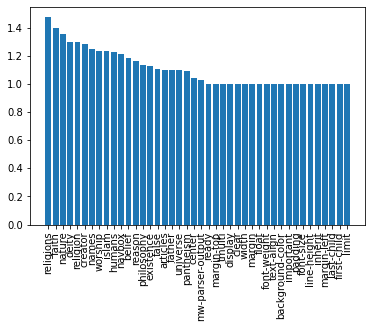

In [55]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()
plot(res)

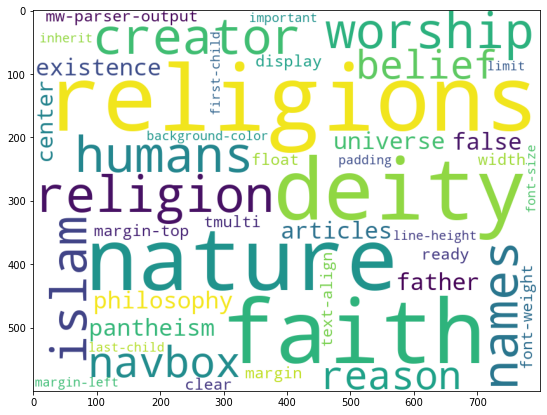

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

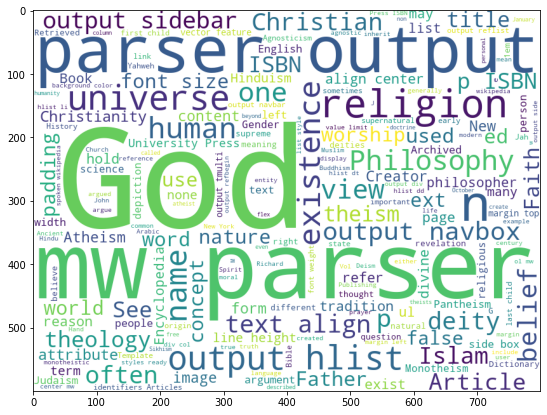

In [57]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))